<font size="+5">#03. Arboles de Decision</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Cargamos los datos del titanic para predecir la **probabilidad de que una persona sobreviva** en función de otras características como la **edad, sexo**, etc...

```python
sns.load_dataset(name='titanic')
```

In [4]:
import seaborn as sns
df = sns.load_dataset(name='titanic').iloc[:,:4]
df.sample(5)

,survived,pclass,sex,age
477,0,3,male,29.0
820,1,1,female,52.0
480,0,3,male,9.0
568,0,3,male,NaN
40,0,3,female,40.0


In [5]:
df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


# Seleccionar Variables para el Modelo

> Comúnmente se conoce a esta temática de la Estadística como **Análisis Exploratorio de los Datos _(EDA)_**. El objetivo fundamental de este tópico es encontrar las variables que más se correlacionen y que den a entender un modelo de Árboles de Decisión, donde la variable objetivo debería ser categórica.
>
> No vamos a aentrar mucho en detalle, de momento. Así que tan solo seleccionaremos variables que nos parezcan interesantes. Estas variables deberemos distinguirlas según su papel en el modelo:
>
> 1.  Explicativas/Features/Input `X`
> 2.  Objetivo/Class/Target `y`

In [6]:
target = df['survived']
explanatory = df.drop(columns='survived')

# Modelo de Árboles de Decisión `DecisionTreeClassifier()`

## Entrenar Modelo

> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
fit()

NameError: name 'fit' is not defined

In [14]:
model = DecisionTreeClassifier()

In [15]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

In [17]:
model.fit(X=explanatory, y= target)

ValueError: could not convert string to float: 'male'

Cuando Python calcula optimiza los modelos por dentro
- hace un conteo de los valores
- si pasamos texto
- va a poder hacer operaciones matematicas?

In [19]:
import pandas as pd

In [20]:
a = pd.DataFrame({'paises': ['Spain', 'Italy', 'France']})

In [21]:
a

,paises
0,Spain
1,Italy
2,France


In [23]:
pd.get_dummies(a, drop_first=True)

,paises_Italy,paises_Spain
0,0,1
1,1,0
2,0,0


In [30]:
df = pd.get_dummies(df, drop_first=True)

In [36]:
df.dropna(inplace=True)

In [37]:
explanatory = df.drop(columns='survived')
target = df['survived']

In [52]:
model = DecisionTreeClassifier(min_samples_leaf=30)

In [53]:
model.fit(X=explanatory, y= target)

DecisionTreeClassifier(min_samples_leaf=30)

## Visualización del Modelo

> - `tree.plot_tree()`

In [54]:
from sklearn import tree

In [55]:
import matplotlib.pyplot as plt

In [56]:
df.columns

Index(['survived', 'pclass', 'age', 'sex_male'], dtype='object')

In [57]:
explanatory.columns

Index(['pclass', 'age', 'sex_male'], dtype='object')

In [59]:
df.head()

,survived,pclass,age,sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1


In [60]:
juana = {'pclass': 2, 'age':30, 'sex_male': 0}

In [65]:
juana = pd.DataFrame(juana, index=['juana'])

In [67]:
juana

,pclass,age,sex_male
juana,2,30,0


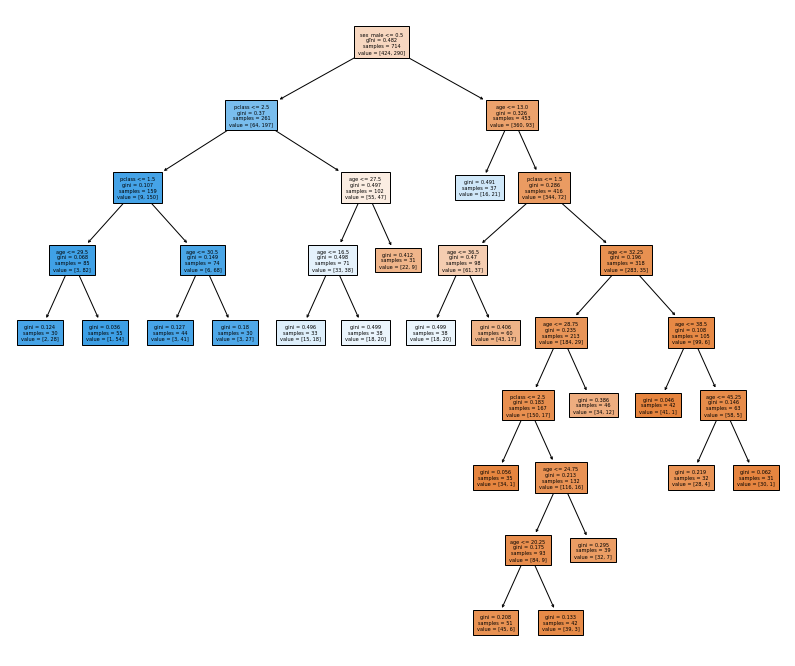

In [58]:
plt.figure(figsize=(14,12))
tree.plot_tree(decision_tree=model, fontsize=5, feature_names=explanatory.columns, filled=True);

In [66]:
juana

,pclass,age,sex_male
juana,2,30,0


## Predicciones con el Modelo

> - `model.predict_proba()`
> - `model.predict()`

In [68]:
41/44

0.9318181818181818

In [70]:
'juana'

'juana'

In [71]:
juana

,pclass,age,sex_male
juana,2,30,0


In [72]:
model.predict_proba(X=juana)

array([[0.06818182, 0.93181818]])

In [73]:
model.predict(X=juana)

array([1])

## Interpretación del Modelo

> ¿Qué tiene que ver el **Análisis Exploratorio de los Datos _(EDA)_** con la Interpretación del Modelo?

# Predicciones vs Realidad

> ¿Cómo de Bueno es mi Modelo? **Bondad de Ajuste**

## Precisión

> - `model.score()`

In [75]:
model.score(X=explanatory, y=target)

0.8081232492997199

In [78]:
pred_proba = model.predict_proba(X=explanatory)[:, 1]

In [80]:
import numpy as np

In [82]:
pred_class = np.where(pred_proba > 0.5, 1, 0)

In [83]:
df.insert(0, 'pred_class', pred_class)
df.insert(0, 'pred_proba', pred_proba)

In [84]:
df.sample(5)

,pred_proba,pred_class,survived,pclass,age,sex_male
566,0.117647,0,0,3,19.0,1
821,0.179487,0,1,3,27.0,1
604,0.526316,1,1,1,35.0,1
24,0.545455,1,0,3,8.0,0
559,0.290323,0,1,3,36.0,0


In [87]:
aciertos = (df['survived'] == df['pred_class']).sum()

In [91]:
total = df['survived'].shape[0]

In [92]:
aciertos/total

0.8081232492997199

## Matriz de Confusión

> 1. **Sensitividad** (aciertos en casos positivos, $y=1$)
> 2. **Especificidad** (aciertos en casos negativos, $y=0$).

In [93]:
from sklearn.metrics import plot_confusion_matrix

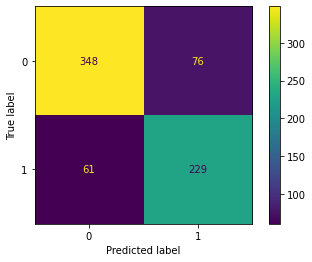

In [95]:
plot_confusion_matrix(estimator=model, X=explanatory, y_true=target)

In [96]:
real_covid = 61 + 229
real_nocovid = 348 + 76

In [97]:
sensibilidad = 229/real_covid

In [98]:
sensibilidad

0.7896551724137931

In [99]:
especificidad = 348/real_nocovid

In [100]:
especificidad

0.8207547169811321

In [105]:
from sklearn.metrics import classification_report, plot_roc_curve

In [102]:
report = classification_report(y_true = target, y_pred = pred_class)

In [103]:
report

'              precision    recall  f1-score   support\n\n           0       0.85      0.82      0.84       424\n           1       0.75      0.79      0.77       290\n\n    accuracy                           0.81       714\n   macro avg       0.80      0.81      0.80       714\nweighted avg       0.81      0.81      0.81       714\n'

In [104]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       424
           1       0.75      0.79      0.77       290

    accuracy                           0.81       714
   macro avg       0.80      0.81      0.80       714
weighted avg       0.81      0.81      0.81       714



## Curva ROC

> Una forma de mezclar tanto la sensitividad, como la especificidad.

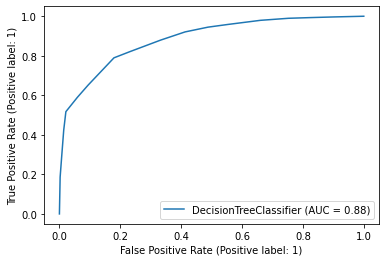

In [107]:
plot_roc_curve(estimator=model, X=explanatory, y=target)